In [1]:
### Packages

using LinearAlgebra
using JLD
using QuadGK
using Statistics
using PyCall
using PyPlot
using LaTeXStrings
using GadgetIO
using GadgetUnits
using GadgetGalaxies
using UnitfulAstro
using Missings

In [2]:
### Read in and process

snap_id     = 136
box4        = "/HydroSims/Magneticum/Box4/uhr_test/"
filepath    = string(box4, "groups_$snap_id/sub_$snap_id")
nsub        = read_subfind(filepath, "NSUB")
println("NSUB size: $(size(nsub))")

neighbors   = load(joinpath(@__DIR__, "results.jld"), "neighbors")
println("neighbors size: $(size(neighbors))")

bvalues     = load(joinpath(@__DIR__, "results.jld"), "bvalues")
bvalues_mss = missings(Float64, length(bvalues))
for i in 1:length(bvalues)
    if bvalues[i] != 0
        bvalues_mss[i] = bvalues[i]
    end
end
replace!(bvalues, 0=>NaN)
println("b-values size: $(size(bvalues))")
println("b-values with missing 0s size: $(size(bvalues_mss))")

b_stats     = zeros(2,length(nsub))
k = 0
for i in 1:length(nsub)
    b_stats[1, i]   = Statistics.mean(skipmissing(bvalues_mss[k+1:k+nsub[i]]))
    b_stats[2, i]   = Statistics.std(skipmissing(bvalues_mss[k+1:k+nsub[i]]))
    k += nsub[i]
end
println("b Statistics size: $(size(b_stats))")

NSUB size: (148471,)
neighbors size: (166479,)
b-values size: (166479,)
b-values with missing 0s size: (166479,)
b Statistics size: (2, 148471)


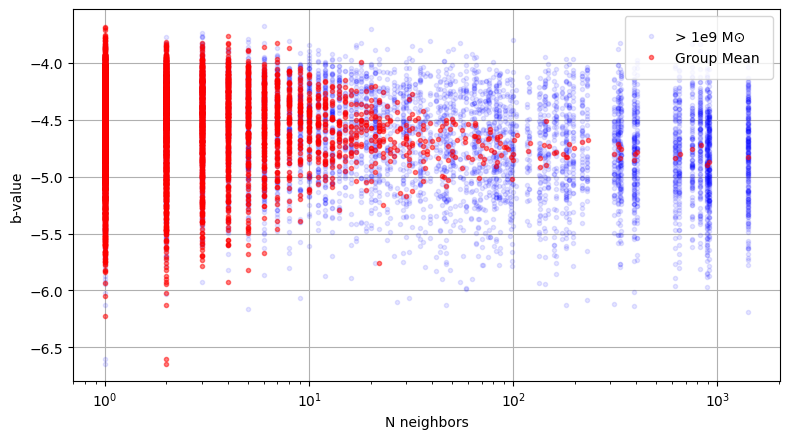

In [3]:
### Figure

scale = 0.5


fig, ax = subplots()

ax.plot(neighbors, bvalues, "b.", label="> 1e9 M⊙", alpha=0.1, zorder=5)
ax.plot(nsub, b_stats[1,:], "r.", label="Group Mean", alpha=0.5, zorder=10)

ax.set_xlabel("N neighbors")
ax.set_xscale("log")

ax.set_ylabel("b-value")

ax.grid()
ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)

fig.set_size_inches(16scale, 9scale)
fig.tight_layout()